# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

# Table of Contents

- [ 1 - Open the Dataset and State the Problem](#1)
  - [ Exercise 1](#ex01)
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`](#2)
  - [ 2.1 - Linear Regression with `NumPy`](#2.1)
    - [ Exercise 2](#ex02)
  - [ 2.2 - Linear Regression with `Scikit-Learn`](#2.2)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)
- [ 3 - Linear Regression using Gradient Descent](#3)
  - [ Exercise 5](#ex05)
  - [ Exercise 6](#ex06)

## Packages

Load the required packages:

In [1]:
import numpy as np

# A library for programmatic plot generation.
import matplotlib.pyplot as plt

# A library for data manipulation and analysis.
import pandas as pd

# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression

Import the unit tests defined for this notebook.

In [ ]:
# import w2_unittest

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook), saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [2]:
path = "./tvmarketing.csv"

### START CODE HERE ### (~ 1 line of code)
adv = pd.read_csv(path)
### END CODE HERE ###

In [3]:
# Print some part of the dataset.
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__ 

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

Correct ✅

In [ ]:
# w2_unittest.test_load_data(adv)

`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

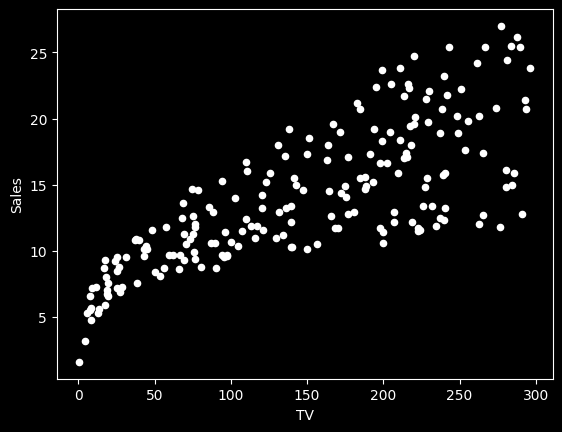

In [7]:
adv.plot(x="TV", y="Sales", kind="scatter", c="white")

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [8]:
X = adv["TV"]
Y = adv["Sales"]

<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [9]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301972. Intercept: 7.032593549127696


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

You can plot the linear regression line by running the following code. The regression line is red.

In [ ]:
def plot_linear_regression(
    X, Y, x_label, y_label, m, b, X_pred=np.array([]), Y_pred=np.array([])
):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))

    ax.plot(X, Y, "o", color="black")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


    ax.plot(X, m * X + b, color="red")

    # Plot prediction points (empty arrays by default - the predictions will be calculated later).

    ax.plot(X_pred, Y_pred, "o", color="blue", markersize=8)



plot_linear_regression(X, Y, "TV", "Sales", m_numpy, b_numpy)

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [ ]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):
    ### START CODE HERE ### (~ 1 line of code)
    Y = None
    ### END CODE HERE ###

    return Y

In [ ]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

##### __Expected Output__ 

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [ ]:
w2_unittest.test_pred_numpy(pred_numpy)

Now you can add the prediction points to the plot (blue dots).

In [ ]:
plot_linear_regression(X, Y, "TV", "Sales", m_numpy, b_numpy, X_pred, Y_pred_numpy)

<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [ ]:
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [ ]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [ ]:
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [ ]:
### START CODE HERE ### (~ 1 line of code)
None.None(None, None)
### END CODE HERE ###

In [ ]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(
    f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}"
)

##### __Expected Output__ 

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [ ]:
w2_unittest.test_sklearn_fit(lr_sklearn)

Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`. 

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [ ]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = None[None, None.None]
    Y = None.None(None)
    ### END CODE HERE ###
    
    return Y

In [ ]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

##### __Expected Output__ 

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [ ]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

The predicted values are also the same.

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 = 
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [ ]:
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)

Define cost function according to the equation $(1)$:

In [ ]:
def E(m, b, X, Y):
    return 1 / (2 * len(Y)) * np.sum((m * X + b - Y) ** 2)

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [ ]:
def dEdm(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Use the following line as a hint, replacing all None.
    res = 1 / len(None) * np.dot(None * None + None - None, None)
    ### END CODE HERE ###

    return res


def dEdb(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Replace None writing the required expression fully.
    res = None
    ### END CODE HERE ###

    return res

In [ ]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

##### __Expected Output__ 

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [ ]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [ ]:
def gradient_descent(
    dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False
):
    for iteration in range(num_iterations):

        ### START CODE HERE ### (~ 2 lines of code)

        m_new = None

        b_new = None

        ### END CODE HERE ###

        m = m_new

        b = b_new

        if print_cost:

            print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")


    return m, b

In [ ]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(
    gradient_descent(
        dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate=0.01, num_iterations=10
    )
)

##### __Expected Output__ 

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [ ]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [ ]:
m_initial = 0
b_initial = 0
num_iterations = 30
learning_rate = 1.2


m_gd, b_gd = gradient_descent(
    dEdm,
    dEdb,
    m_initial,
    b_initial,
    X_norm,
    Y_norm,
    learning_rate,
    num_iterations,
    print_cost=True,
)



print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [ ]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X)) / np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

You should have gotten similar results as in the previous sections. 

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.